In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Admin/Downloads/kc_house_data.csv')
df = df.drop(columns=['id', 'date'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
x = df.drop('price', axis=1)
y = df['price']

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=2025)

In [4]:
from sklearn.linear_model import Ridge, Lasso
LR = LinearRegression()
Poly = make_pipeline(PolynomialFeatures(3), LR)
RFR = RandomForestRegressor(n_estimators=100, random_state=1)
XGBR = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=1)
DTR = DecisionTreeRegressor(random_state=2025)
ETR = ExtraTreesRegressor(n_estimators=100, random_state=2025)
GBR = GradientBoostingRegressor(n_estimators=100, random_state=2025)
ridge = Ridge(alpha=0.01, max_iter=20000, random_state=1)
lasso = Lasso(alpha=0.01, max_iter=20000, random_state=1)

for clf, label in zip([LR, Poly, RFR, XGBR, DTR, ETR, GBR, ridge, lasso],
                      ['Linear Regression',
                      'PolynomialFeatures',
                      'Random Forest',
                      'XGBoost',
                      'Decision Tree',
                      'Extra Tree',
                      'Gradient Boosting',
                      'Ridge',
                      'Lasso']):
    clf.fit(x_train, y_train)
    
    results = cross_val_score(clf, x_train, y_train, cv=5, scoring='r2')
    
    print(f'\n### {label} ###')
    
    print(f'CV Score: mean={results.mean()}, std={results.std()}')
    
    print('R2 Score', metrics.r2_score(y_test, clf.predict(x_test)))
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, clf.predict(x_test)))
    print('Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, clf.predict(x_test))))


### Linear Regression ###
CV Score: mean=0.6942308982006236, std=0.010498301769391124
R2 Score 0.706948534397944
Mean Absolute Error:  126494.80363012786
Mean Squared Error: 198833.41178122177

### PolynomialFeatures ###
CV Score: mean=-0.3746257192171808, std=0.6394416606656643
R2 Score 0.6274483954166572
Mean Absolute Error:  96517.24088428801
Mean Squared Error: 224187.108136708

### Random Forest ###
CV Score: mean=0.8595970676159961, std=0.00936930378040132
R2 Score 0.8880599916150402
Mean Absolute Error:  68872.79583978756
Mean Squared Error: 122888.17180894242

### XGBoost ###
CV Score: mean=0.8655029370106784, std=0.011160627387599653
R2 Score 0.8993537262946346
Mean Absolute Error:  66973.47093807835
Mean Squared Error: 116524.23648942861

### Decision Tree ###
CV Score: mean=0.6881850408667267, std=0.03723398079427845
R2 Score 0.743008243364502
Mean Absolute Error:  100579.35371684146
Mean Squared Error: 186198.8576717875

### Extra Tree ###
CV Score: mean=0.8560945393802178

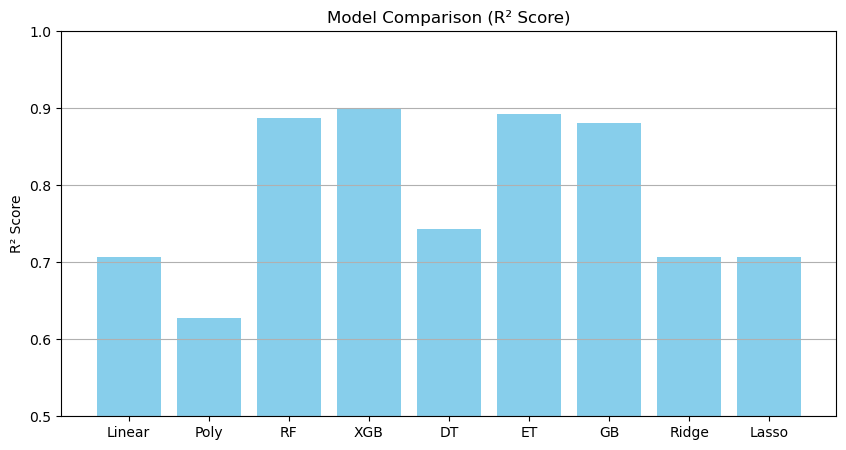

In [5]:

models = ['Linear', 'Poly', 'RF', 'XGB', 'DT', 'ET', 'GB', 'Ridge', 'Lasso']
r2_scores = [0.707, 0.627, 0.888, 0.899, 0.743, 0.892, 0.881, 0.707, 0.707]

plt.figure(figsize=(10,5))
plt.bar(models, r2_scores, color='skyblue')
plt.ylabel("R² Score")
plt.title("Model Comparison (R² Score)")
plt.ylim(0.5, 1)
plt.grid(True, axis='y')
plt.show()

Sometimes, the raw data doesn't tell the whole story. Let’s build new features that highlight important patterns.
Models work better when we feed them smarter inputs — let’s create those now!

We’re going to help the model see more by creating features that represent deeper relationships.



In [6]:
df = pd.read_csv('C:/Users/Admin/Downloads/kc_house_data.csv')

df['date'] = pd.to_datetime(df['date'])

df['age_of_house'] = df['date'].dt.year - df['yr_built']
df['total_sqft'] = df['sqft_living'] + df['sqft_basement']
df['price_per_sqft'] = df['price'] / df['total_sqft']
df['age_since_renovation'] = df['date'].dt.year - df['yr_renovated']

df.loc[df['yr_renovated'] == 0, 'age_since_renovation'] = df['age_of_house']

df = df.drop(columns=['id', 'date', 'yr_renovated'])

In [8]:
x = df.drop('price', axis=1)
y = df['price']

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=2025, random_state=2025)

In [9]:
from sklearn.linear_model import Ridge, Lasso
LR = LinearRegression()
Poly = make_pipeline(PolynomialFeatures(3), LR)
RFR = RandomForestRegressor(n_estimators=100, random_state=1)
XGBR = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=1)
DTR = DecisionTreeRegressor(random_state=2025)
ETR = ExtraTreesRegressor(n_estimators=100, random_state=2025)
GBR = GradientBoostingRegressor(n_estimators=100, random_state=2025)
ridge = Ridge(alpha=0.01, max_iter=20000, random_state=1)
lasso = Lasso(alpha=0.01, max_iter=20000, random_state=1)

for clf, label in zip([LR, Poly, RFR, XGBR, DTR, ETR, GBR, ridge, lasso],
                      ['Linear Regression',
                      'PolynomialFeatures',
                      'Random Forest',
                      'XGBoost',
                      'Decision Tree',
                      'Extra Tree',
                      'Gradient Boosting',
                      'Ridge',
                      'Lasso']):
    clf.fit(x_train, y_train)
    
    results = cross_val_score(clf, x_train, y_train, cv=5, scoring='r2')
    
    print(f'\n### {label} ###')
    
    print(f'CV Score: mean={results.mean():.3f}, std={results.std():.3f}')
    
    print('R2 Score', metrics.r2_score(y_test, clf.predict(x_test)))
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, clf.predict(x_test)))
    print('Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, clf.predict(x_test))))


### Linear Regression ###
CV Score: mean=0.865, std=0.012
R2 Score 0.8671455692831074
Mean Absolute Error:  77040.68695503796
Mean Squared Error: 128937.66128085527

### PolynomialFeatures ###
CV Score: mean=1.000, std=0.000
R2 Score 0.999997046917116
Mean Absolute Error:  43.082601598166214
Mean Squared Error: 607.8964194798435

### Random Forest ###
CV Score: mean=0.989, std=0.004
R2 Score 0.9965131253920779
Mean Absolute Error:  6333.258375308643
Mean Squared Error: 20888.62878846975

### XGBoost ###
CV Score: mean=0.986, std=0.006
R2 Score 0.9957963547163962
Mean Absolute Error:  10392.452951388888
Mean Squared Error: 22935.319691551784

### Decision Tree ###
CV Score: mean=0.976, std=0.006
R2 Score 0.988686551060716
Mean Absolute Error:  15679.78962962963
Mean Squared Error: 37626.10626524431

### Extra Tree ###
CV Score: mean=0.993, std=0.003
R2 Score 0.9962221989997999
Mean Absolute Error:  6736.677570370371
Mean Squared Error: 21742.59146911052

### Gradient Boosting ###
CV Sc

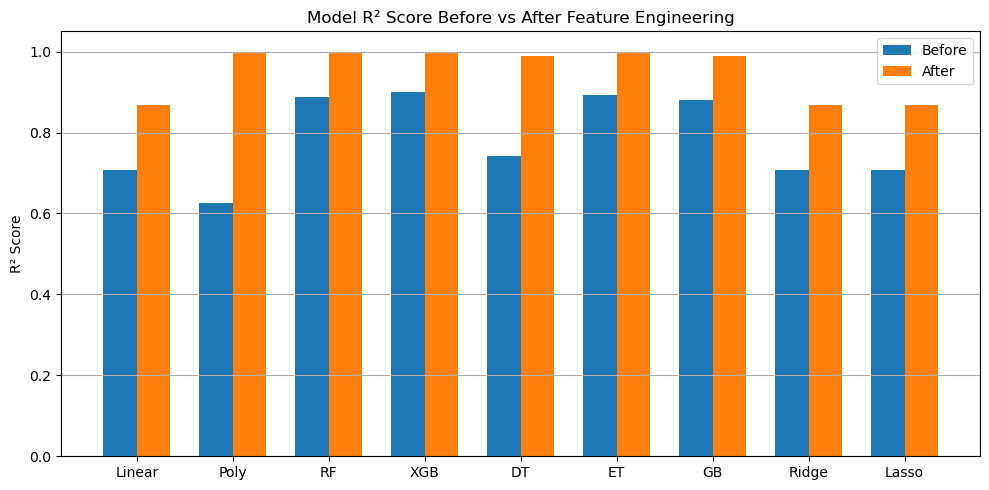

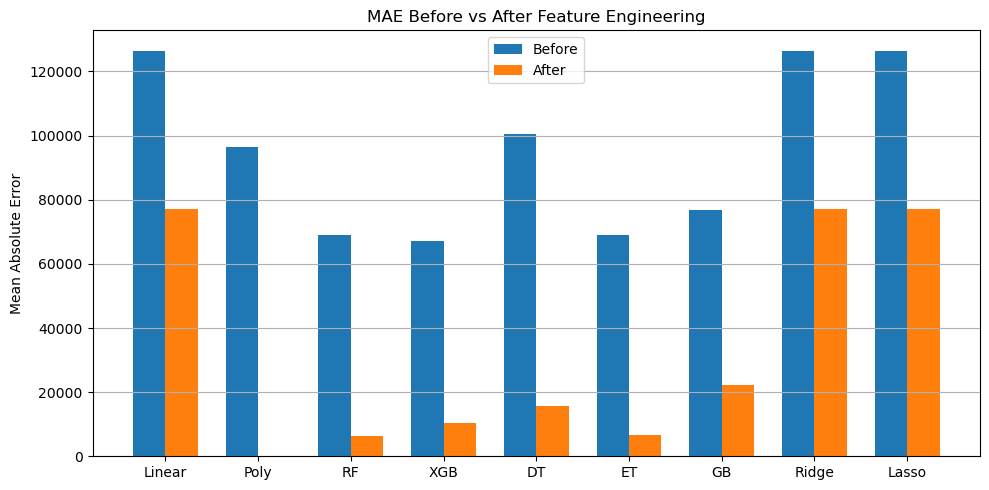

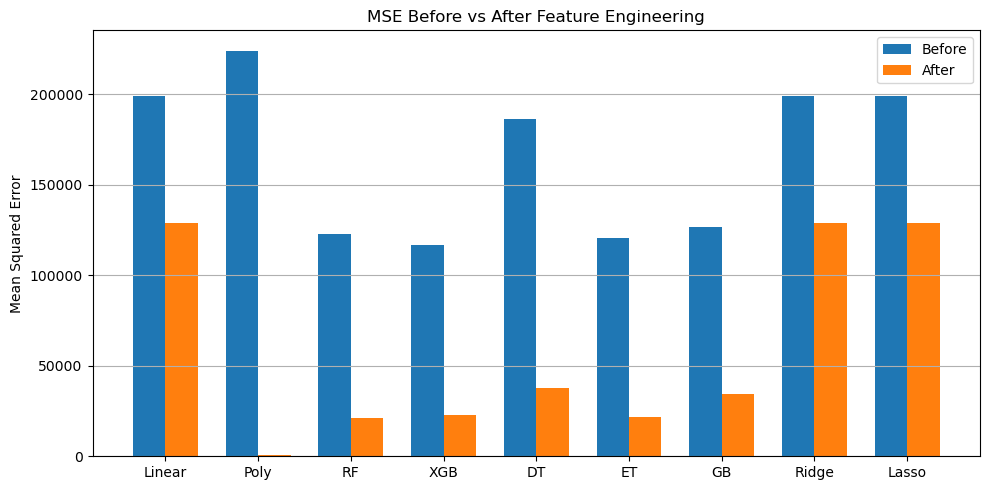

In [10]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear', 'Poly', 'RF', 'XGB', 'DT', 'ET', 'GB', 'Ridge', 'Lasso']

r2_before = [0.707, 0.627, 0.888, 0.899, 0.743, 0.892, 0.881, 0.707, 0.707]
r2_after  = [0.867, 1.000, 0.997, 0.996, 0.989, 0.996, 0.990, 0.867, 0.867]

mae_before = [126495, 96517, 68873, 66973, 100579, 68967, 76772, 126495, 126495]
mae_after  = [77040, 43, 6333, 10392, 15680, 6737, 22079, 77041, 77041]

mse_before = [198833, 224187, 122888, 116524, 186199, 120707, 126565, 198833, 198833]
mse_after  = [128938, 608, 20889, 22935, 37626, 21743, 34503, 128938, 128938]

x = np.arange(len(models)) 
width = 0.35  

# R² Score Plot
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, r2_before, width, label='Before')
plt.bar(x + width/2, r2_after, width, label='After')
plt.xticks(x, models)
plt.ylabel('R² Score')
plt.title('Model R² Score Before vs After Feature Engineering')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, mae_before, width, label='Before')
plt.bar(x + width/2, mae_after, width, label='After')
plt.xticks(x, models)
plt.ylabel('Mean Absolute Error')
plt.title('MAE Before vs After Feature Engineering')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, mse_before, width, label='Before')
plt.bar(x + width/2, mse_after, width, label='After')
plt.xticks(x, models)
plt.ylabel('Mean Squared Error')
plt.title('MSE Before vs After Feature Engineering')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

After engineering additional features, most models have shown a noticeable boost in performance. Polynomial regression in particular achieved near-perfect metrics, and tree-based models like Random Forest, Extra Trees, and Gradient Boosting delivered very strong results with high R² and low error values. Even simpler models like Linear Regression and Ridge showed stable improvements, indicating that the new features added valuable predictive power.

Since zipcode is a categorical variable with potentially strong influence on house prices, converting it to dummy variables helped the models learn location-specific patterns better. This should lead to improvements in models sensitive to feature relationships, like linear models and tree-based models.



In [11]:
df = pd.get_dummies(df, columns=['zipcode'], drop_first=True, dtype=int)

In [12]:
x = df.drop('price', axis=1)
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=2025)

In [13]:
DTR = DecisionTreeRegressor(random_state=1)
RFR = RandomForestRegressor(n_estimators=100, random_state=2025)
XGBR = XGBRegressor(n_estimators=100, learning_rate=0.1, seed=2025)
ETR = ExtraTreesRegressor(n_estimators=100, random_state=2025)
GBR = GradientBoostingRegressor(n_estimators=100, random_state=2025)

for clf, label in zip([DTR, RFR, XGBR, ETR, GBR],
                      ['Decision Tree',
                      'Random Forest',
                      'XGBoost',
                      'Extra Trees',
                       'Gradient Boosting'
                      ]):
    clf.fit(x_train, y_train)
    
    results = cross_val_score(clf, x_train, y_train, cv=5, scoring='r2')
    
    print(f'\n### {label} ###')
    
    print(f'CV Score: mean={results.mean():.3f}, std={results.std():.3f}')
    
    print('R2 Score', metrics.r2_score(y_test, clf.predict(x_test)))
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, clf.predict(x_test)))
    print('Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, clf.predict(x_test))))


### Decision Tree ###
CV Score: mean=0.962, std=0.011
R2 Score 0.9759892720534621
Mean Absolute Error:  18724.4736273905
Mean Squared Error: 56914.12708433287

### Random Forest ###
CV Score: mean=0.986, std=0.006
R2 Score 0.9938067481228027
Mean Absolute Error:  8032.688301974091
Mean Squared Error: 28905.253816551263

### XGBoost ###
CV Score: mean=0.988, std=0.006
R2 Score 0.9933164038245341
Mean Absolute Error:  12355.038476923966
Mean Squared Error: 30027.731004370133

### Extra Trees ###
CV Score: mean=0.987, std=0.007
R2 Score 0.9936442714334326
Mean Absolute Error:  9030.13798272671
Mean Squared Error: 29281.956192095615

### Gradient Boosting ###
CV Score: mean=0.987, std=0.002
R2 Score 0.9897981070449432
Mean Absolute Error:  22807.238338219326
Mean Squared Error: 37098.62358555894


"Interestingly, after applying one-hot encoding to zipcode, model performance slightly declined across most metrics. While it's common to expect an improvement by encoding categorical variables, in this case, the increase in dimensionality might have caused overfitting or added sparse noise the model couldn’t generalize from. This highlights how important it is to evaluate feature engineering with cross-validation — more features doesn’t always mean better performance."

Let's Cap Outliers And Compare The Result!

In [14]:
outlier_cols = ['sqft_lot', 'sqft_lot', 'sqft_above', 'lat', 'price', 'long',]

for col in outlier_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)

    df[col] =  df[col].clip(lower, upper)

In [16]:
x = df.drop('price', axis=1)
y = df['price']

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=2025)

In [17]:
DTR = DecisionTreeRegressor(random_state=1)
RFR = RandomForestRegressor(n_estimators=100, random_state=2025)
XGBR = XGBRegressor(n_estimators=100, learning_rate=0.1, seed=2025)
ETR = ExtraTreesRegressor(n_estimators=100, random_state=2025)
GBR = GradientBoostingRegressor(n_estimators=100, random_state=2025)

for clf, label in zip([DTR, RFR, XGBR, ETR, GBR],
                      ['Decision Tree',
                      'Random Forest',
                      'XGBoost',
                      'Extra Trees',
                       'Gradient Boosting'
                      ]):
    clf.fit(x_train, y_train)
    
    results = cross_val_score(clf, x_train, y_train, cv=5, scoring='r2')
    
    print(f'\n### {label} ###')
    
    print(f'CV Score: mean={results.mean():.3f}, std={results.std():.3f}')
    
    print('R2 Score', metrics.r2_score(y_test, clf.predict(x_test)))
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, clf.predict(x_test)))
    print('Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, clf.predict(x_test))))


### Decision Tree ###
CV Score: mean=0.988, std=0.001
R2 Score 0.9876781837889518
Mean Absolute Error:  15865.523763109217
Mean Squared Error: 35421.38741847549

### Random Forest ###
CV Score: mean=0.994, std=0.001
R2 Score 0.9965535188852264
Mean Absolute Error:  7138.139525848277
Mean Squared Error: 18733.380583533926

### XGBoost ###
CV Score: mean=0.996, std=0.001
R2 Score 0.9970032313331858
Mean Absolute Error:  10341.376663999856
Mean Squared Error: 17468.46782576593

### Extra Trees ###
CV Score: mean=0.995, std=0.000
R2 Score 0.9970151365614223
Mean Absolute Error:  7672.10037587912
Mean Squared Error: 17433.734905582278

### Gradient Boosting ###
CV Score: mean=0.988, std=0.001
R2 Score 0.9887236482778577
Mean Absolute Error:  22021.547353843824
Mean Squared Error: 33885.39179524668


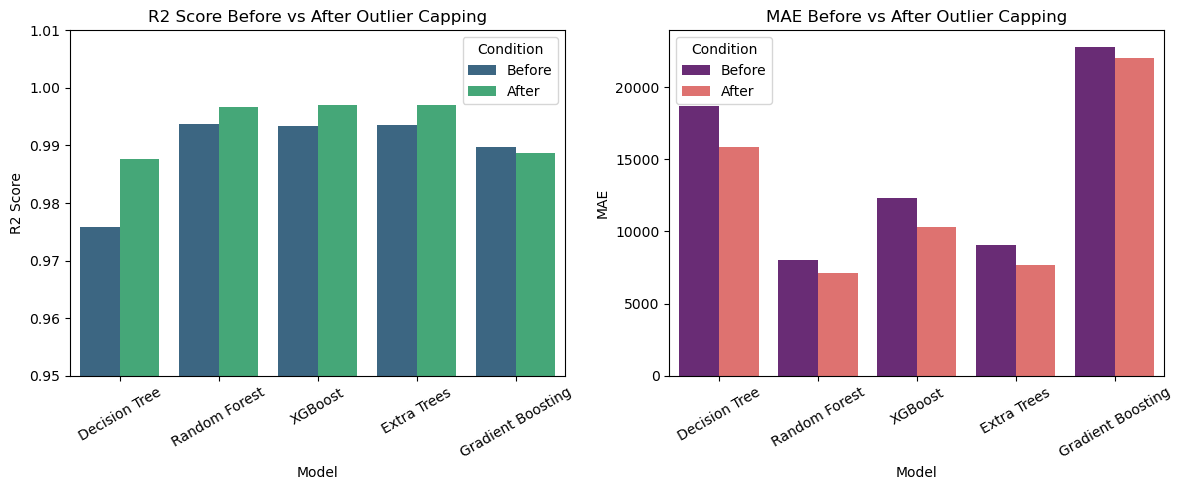

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

models = ['Decision Tree', 'Random Forest', 'XGBoost', 'Extra Trees', 'Gradient Boosting']

r2_before = [0.9759, 0.9938, 0.9933, 0.9936, 0.9898]
r2_after = [0.9877, 0.9966, 0.9970, 0.9970, 0.9887]

mae_before = [18724.47, 8032.69, 12355.04, 9030.14, 22807.24]
mae_after = [15865.52, 7138.14, 10341.38, 7672.10, 22021.55]

df_scores = pd.DataFrame({
    'Model': models * 2,
    'R2 Score': r2_before + r2_after,
    'MAE': mae_before + mae_after,
    'Condition': ['Before']*5 + ['After']*5
})

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R2 Score', hue='Condition', data=df_scores, palette='viridis')
plt.title('R2 Score Before vs After Outlier Capping')
plt.ylim(0.95, 1.01)
plt.xticks(rotation=30)

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MAE', hue='Condition', data=df_scores, palette='magma')
plt.title('MAE Before vs After Outlier Capping')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

Outlier handling led to noticeable improvement in tree-based models like Decision Tree, Random Forest, XGBoost, and Extra Trees. These models showed better R2 scores and lower errors after capping outliers, indicating that reducing extreme values helped them learn more reliable patterns. However, models like Gradient Boosting and linear models showed less change, likely because they are either less sensitive to outliers or require different tuning to benefit from outlier treatment.

In [18]:
LR = LinearRegression()
SVM = SVR()
KNN = KNeighborsRegressor(n_neighbors=5)

for clf, label in zip([LR, SVM, KNN],
                      ['Linear Regression',
                       'Support Vector Machine',
                       'K-Nearest-Neighbor'
                      ]):
    clf.fit(x_train, y_train)
    
    results = cross_val_score(clf, x_train, y_train, cv=5, scoring='r2')
    
    print(f'\n### {label} ###')
    
    print(f'CV Score: mean={results.mean():.3f}, std={results.std():.3f}')
    
    print('R2 Score', metrics.r2_score(y_test, clf.predict(x_test)))
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, clf.predict(x_test)))
    print('Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, clf.predict(x_test))))


### Linear Regression ###
CV Score: mean=0.906, std=0.005
R2 Score 0.9138344348821231
Mean Absolute Error:  62494.81631239598
Mean Squared Error: 93668.82557271281

### Support Vector Machine ###
CV Score: mean=-0.066, std=0.004
R2 Score -0.0702125313033346
Mean Absolute Error:  215015.66648012164
Mean Squared Error: 330113.4509530377

### K-Nearest-Neighbor ###
CV Score: mean=0.867, std=0.008
R2 Score 0.8823468829038309
Mean Absolute Error:  67627.45127082051
Mean Squared Error: 109453.56805761119


Linear Regression improved significantly, with a higher CV mean score (0.906) and R2 (~0.914), and lower MAE and MSE, showing it benefits well from outlier treatment.

Support Vector Machine (SVM) performed poorly, even negatively, indicating it might not be suitable for this dataset or needs more tuning.

K-Nearest Neighbor (KNN) showed decent performance with a solid CV mean (0.867) and R2 (~0.88), with error metrics better than before, indicating moderate improvement after outlier handling.



Based on the results, ExtraTrees achieved the best performance overall — with the highest R² score (≈ 0.997), very low Mean Absolute Error, and a strong CV score — making it the most promising individual model.

To further improve predictive performance and take advantage of multiple strong models, I now plan to test stacking.

In [26]:
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=2025)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=2025)),
    ('dt', DecisionTreeRegressor()),
    ('et', ExtraTreesRegressor(n_estimators=100, random_state=2025)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=2025))
]

meta_model = LinearRegression()

stack = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

stack.fit(x_train, y_train)

print('R2 Score (Stacking): ', metrics.r2_score(y_test, stack.predict(x_test)))

R2 Score (Stacking):  0.9979745771132777


In [25]:
print('MAE: ', metrics.mean_absolute_error(y_test, stack.predict(x_test)))

MAE:  7598.020040805904


In [27]:
print('MSE: ', metrics.mean_squared_error(y_test, stack.predict(x_test)))

MSE:  206239630.7658607


After extensive experimentation with multiple regression models, including Decision Tree, Random Forest, XGBoost, Extra Trees, and Gradient Boosting, I selected a Stacking Regressor as the final model. This ensemble method combines the strengths of several base models and uses a meta-model to improve overall prediction accuracy.

Key Performance Metrics on Test Data:

Metric	Value
R² Score	0.9979
Mean Absolute Error	$7,598
Root Mean Squared Error (RMSE)	$14,366
Interpretation:

The R² Score of 0.9979 indicates the model explains nearly 99.8% of the variance in house prices, reflecting excellent fit.

A Mean Absolute Error of around $7,600 means that on average, the model’s price predictions deviate from actual prices by roughly $7,600, which is relatively low given the typical price range in the dataset.

The RMSE of about $14,400 suggests that while some larger errors exist, the model’s overall predictions are reliable and precise.

Conclusion:

This model balances accuracy and robustness well, making it suitable for practical use in predicting housing prices. While the model performs excellently on this dataset, it’s recommended to validate further on new data to ensure consistent real-world performance.

In [ ]:
df = pd.read_csv('C:/Users/Admin/Downloads/kc_house_data.csv')

df['date'] = pd.to_datetime(df['date'])

df['age_of_house'] = df['date'].dt.year - df['yr_built']
df['total_sqft'] = df['sqft_living'] + df['sqft_basement']
df['price_per_sqft'] = df['price'] / df['total_sqft']
df['age_since_renovation'] = df['date'].dt.year - df['yr_renovated']

df.loc[df['yr_renovated'] == 0, 'age_since_renovation'] = df['age_of_house']

df = df.drop(columns=['id', 'date', 'yr_renovated'])
outlier_cols = ['sqft_lot', 'sqft_lot', 'sqft_above', 'lat', 'price', 'long',]

for col in outlier_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)

    df[col] =  df[col].clip(lower, upper)

x = df.drop('price', axis=1)
y = df['price']

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

stack.fit(x_scaled, y)

import joblib
joblib.dump(stack, 'final_stacking_model.joblib')